In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan_borowwer_data (1).csv');
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


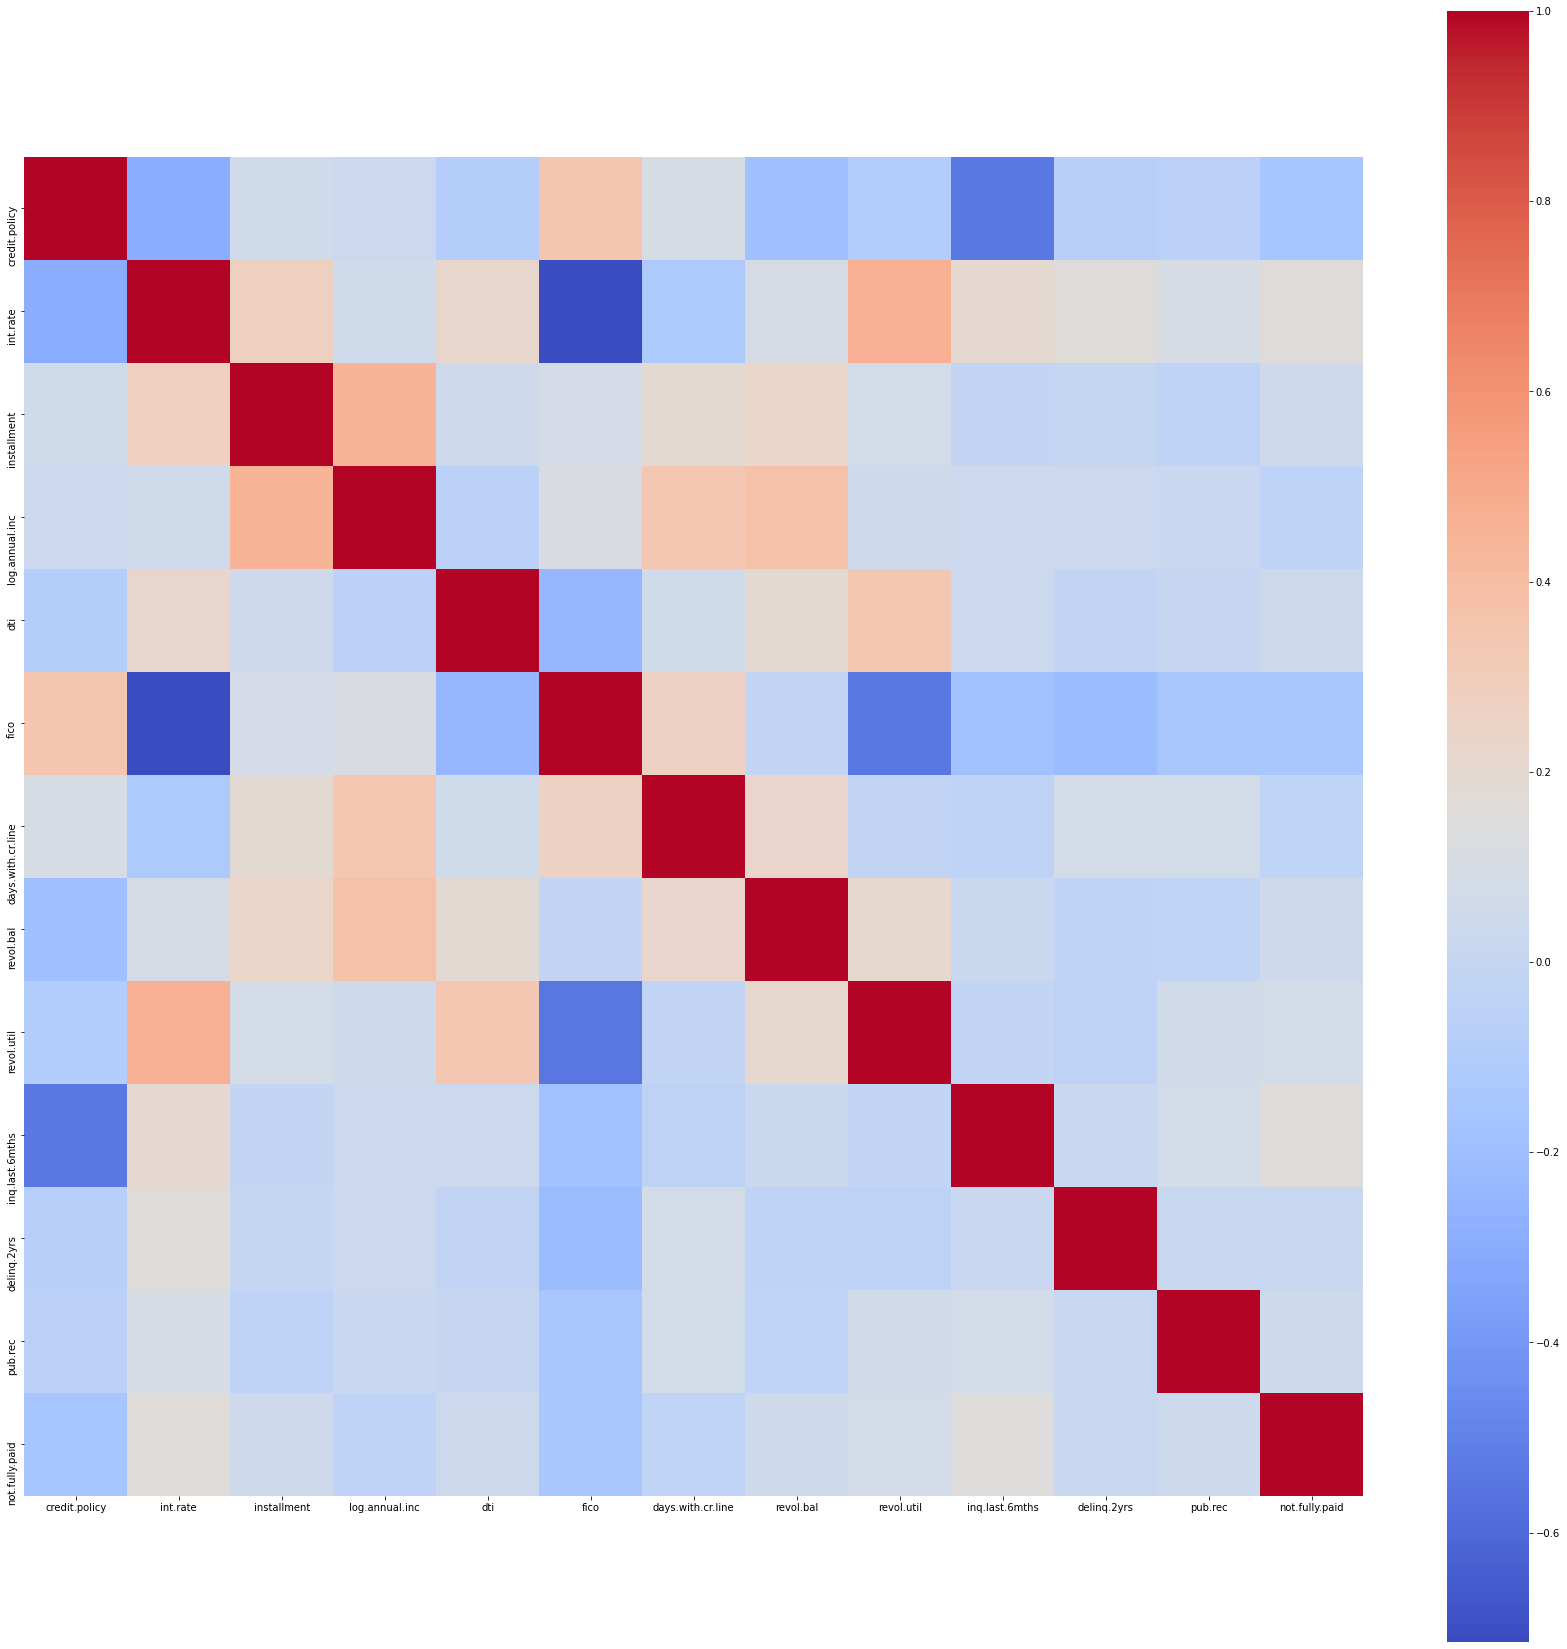

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr() # .corr is used for find corelation
plt.figure(figsize=(30,30))
sns.heatmap(corr, cbar = True,  square = True, cmap= 'coolwarm')
plt.show()

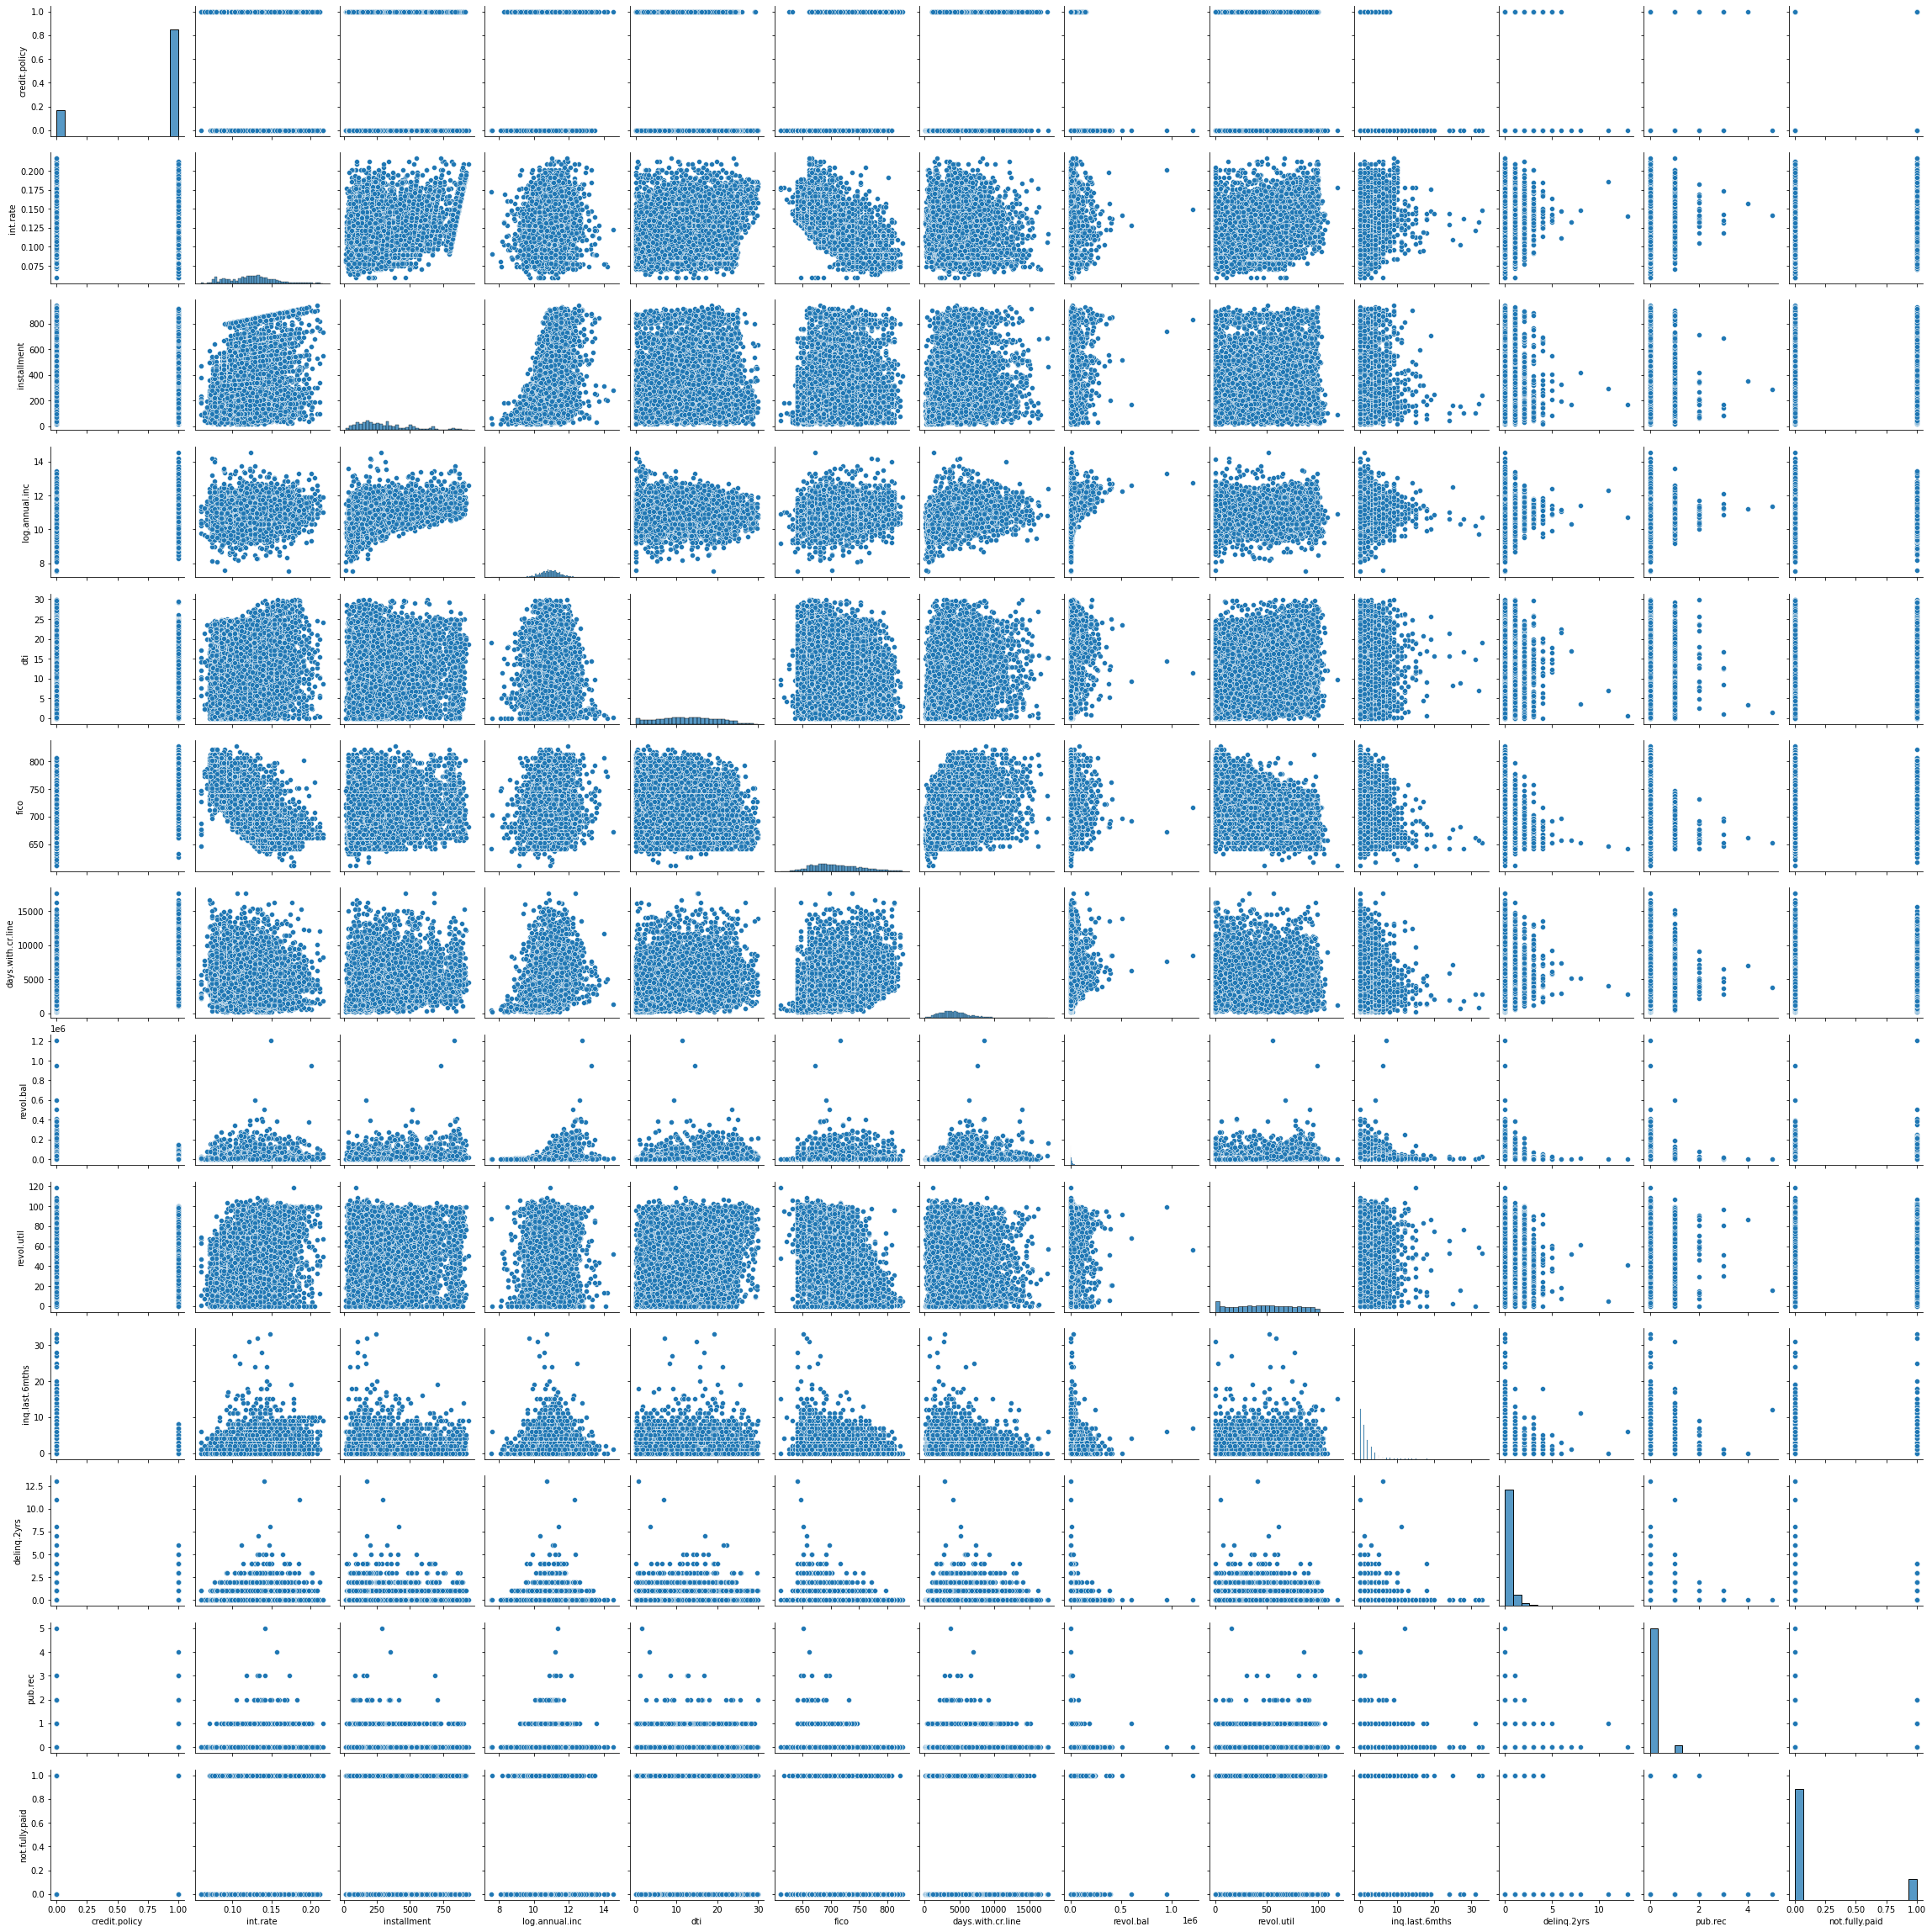

In [7]:
sns.pairplot(df)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
train, test = train_test_split(df, test_size = 0.4)

In [18]:
prediction_var =df.drop("not.fully.paid",axis=1)
prediction_var

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [15]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import tree

C:\Users\Kapil\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


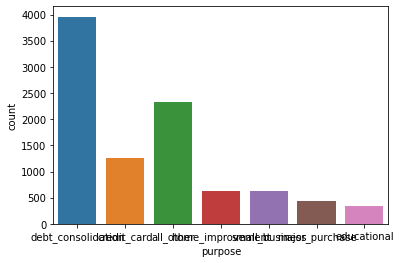

In [19]:
from sklearn.preprocessing import LabelEncoder
sns.countplot(df['purpose'],label="Count")
plt.show()

In [31]:
le = LabelEncoder()
data2 = df
label = le.fit_transform(df['purpose'])
data2 = df.drop(['purpose'],axis = 'columns')
data2['purpose'] = label
data2
df = data2

In [32]:
print(train.shape)
print(test.shape)

(5746, 14)
(3832, 14)


In [33]:
prediction_var =df.drop("not.fully.paid",axis=1)
prediction_var
X = prediction_var
y = df['not.fully.paid']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=85)

In [35]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(X_train,y_train)# now fit our model for traiing data
prediction=model.predict(X_test)# predict for the test data
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,y_test))

0.8385525400139179


In [37]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
prediction=model.predict(X_test)

In [39]:
df=pd.DataFrame(prediction,y_test)
print(df)
print(metrics.accuracy_score(prediction,y_test))

                0
not.fully.paid   
1               1
0               0
0               0
0               0
0               0
...            ..
1               0
1               1
0               0
0               0
0               1

[2874 rows x 1 columns]
0.7428670842032011
